#### docling
- https://zenn.dev/kun432/scraps/2a1e2456fc68bf
- （精度低かったが）TesseractOcrのインストールは日本語パックのインストールを忘れないこと
  - brew install tesseract-lang

In [1]:
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import (
    PdfPipelineOptions,
    EasyOcrOptions,
    TableFormerMode,
)
from docling.models.tesseract_ocr_cli_model import TesseractCliOcrOptions
from docling.models.tesseract_ocr_model import TesseractOcrOptions

from docling.document_converter import DocumentConverter, PdfFormatOption
from docling.backend.docling_parse_v2_backend import DoclingParseV2DocumentBackend

# EasyOCRの言語オプションを設定
ocr_options = EasyOcrOptions(lang=["ja"])
# ocr_options = TesseractOcrOptions(lang=["jpn"])

pipeline_options = PdfPipelineOptions()
# OCRの使用有無: 使用する
pipeline_options.do_ocr = True
# テーブル構造モデルの使用有無: 使用する
pipeline_options.do_table_structure = True
# セルの認識方法: ビジュアルに基づいてセルを認識させる
pipeline_options.table_structure_options.do_cell_matching = True
# テーブル構造モデルのモード: 正確さを重視
pipeline_options.table_structure_options.mode = TableFormerMode.ACCURATE
# パイプラインにOCRオプションを設定
pipeline_options.ocr_options = ocr_options

doc_converter = (
    DocumentConverter(
        format_options={
            InputFormat.PDF: PdfFormatOption(
                pipeline_options=pipeline_options,
                # PDFバックエンドにDLPARSE_V2を使用
                # backend=DoclingParseV2DocumentBackend,
            ),
        }
    )
)


In [2]:
result = doc_converter.convert(r"../data/raw/shisanhyo.pdf")
print(result.document.export_to_markdown())

/Users/tmina/anaconda3/envs/myenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Fetching 9 files: 100%|██████████| 9/9 [00:00<00:00, 68759.08it/s]


## 残高試算表

## 貸借対照表

## 2020/04-2021/03

|                       | 前期残高   | 借方金額     | 貸方金額    | 期末残高   | 構成比   |
|-----------------------|------------|--------------|-------------|------------|----------|
| 現金                  | 104,353    | 4,283,707    | 4,171,958   | 216,102    | 0.2%     |
| 小口現金              | 43,288     | 2,060,879    | 2,025,828   | 78,339     |          |
| 工場小口現金          | 065 61,    | 2,112,828    | 2,144,330   | 563 29,    |          |
| 補助科目なし          |            | 110,000      | 1,800       | 108,200    |          |
| 普通預金              | 8,162,334  | 597,274 161, | 130,000,009 | 39,759,599 | 32.1%    |
| 東銀行 1234567        | 3,725,466  | 37,332,912   | 36,200,000  | 4,858,378  |          |
| 東銀行 2233445        | 1,565,803  | 105,851,000  | 77,319,495  | 30,097,308 |          |
| 東銀行 3334444        | 1,560,812  | 4,412,144    | 3,852,487   | 2,120,469  |          |
| クラウト"銀行 9999999 | 1,310,253  | 001,218 14,  | 12,628,027  | 2,683,444  |          |
| 【現

In [3]:
result = doc_converter.convert(r"../data/raw/shisanhyo_down.pdf")
print(result.document.export_to_markdown())

## 2020/04-2021/03

【黄位: 円)

|                   | 前州建高   | 偽方宏剤    | 伎方日獅      | 州末戒高    | 加戒比   |
|-------------------|------------|-------------|---------------|-------------|----------|
| 唄金              | 1の,:5;    | 4,283,707   | 4,171,958     | 216,102     | 0.び     |
| 小川‥金           | 43,288     | 2,06,879    | 2,025,828     | 78,139      |          |
| 工ど小口環金      | 口け 6,    | 2,川12,528  | 2,小川        | 29,561      |          |
| 湖助川なし        |            | 川じ,[の    | 1,800         | 108,2の     |          |
| 川辺炉金          | 8,162,"」  | 161,597,274 | 上川,(の,(が4 | 39,759,599  | '2,1     |
| 東訳行 1234567    | 3,725,46   | 37,132,912  | 36,200,0の    | 1,858,178   |          |
| 東町行 221415     | 1,565,8ロ3 | 1,851,000   | 77,39,95      | 30,097,308  |          |
| 東駅行 3*4444     | 1,560,812  | 上 |        | 3,852,187     | 2,120,69    |          |
| クリ'映行 9999999 | 1,川の,23  | 14,001,218  | 12,628,027    | 2, # 68 ,   |          |
| 【現金及び竜盆行: | 8,266,687  | 165,880,981 | 13,171,967   

#### RealESRGAN
- https://github.com/xinntao/Real-ESRGAN?tab=readme-ov-file#-quick-inference
- CPUだと半精度が機能しないので、--fp32オプションをつける。

In [4]:
# python inference_realesrgan.py -n RealESRGAN_x4plus.pth -i inputs --fp32

In [ ]:
import cv2
from cv2 import dnn_superres

# 超解像オブジェクトの作成
sr = dnn_superres.DnnSuperResImpl_create()

# 画像の読み込み
image = cv2.imread('shisanhyo_down.jpg')

# モデルの読み込みと設定
# model_path = "EDSR_x4.pb"
# sr.readModel(model_path)
# sr.setModel("edsr", 4)

# model_path = "FSRCNN_x4.pb"
# sr.readModel(model_path)
# sr.setModel("fsrcnn", 4)

# model_path = "ESPCN_x4.pb"
# sr.readModel(model_path)
# sr.setModel("espcn", 4)

# model_path = "LapSRN_x8.pb"
# sr.readModel(model_path)
# sr.setModel("lapsrn", 8)

# 超解像の実行
result = sr.upsample(image)

# 結果の保存
cv2.imwrite("shisanhyo_up.jpg", result)

True

画像の読み込み
グレースケール変換


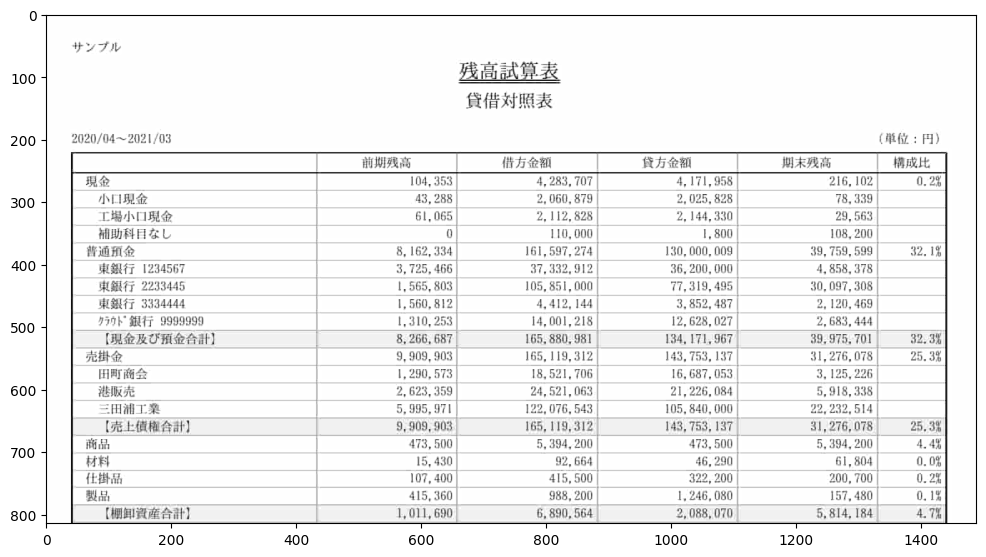

ガウシアンブラーでノイズ除去


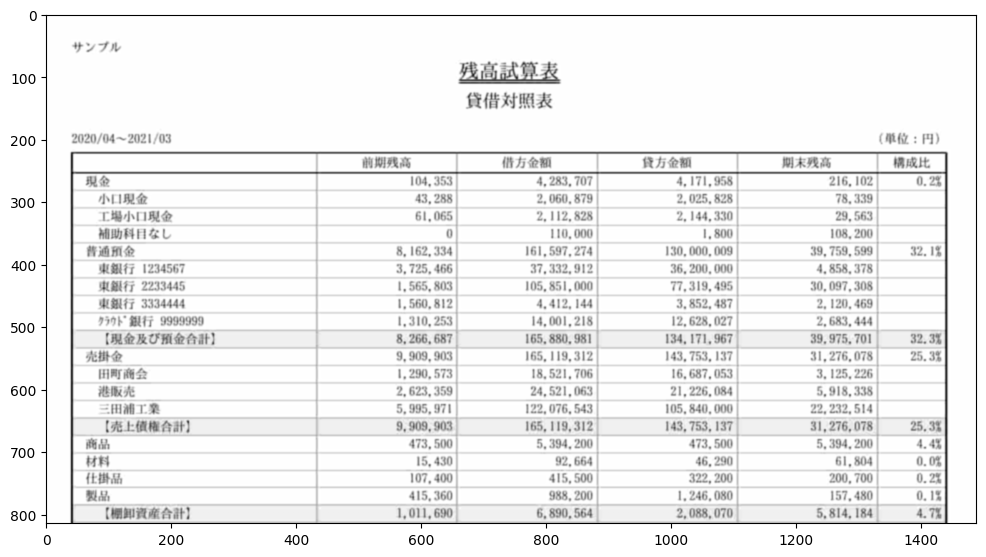

二値化（適応的閾値処理）


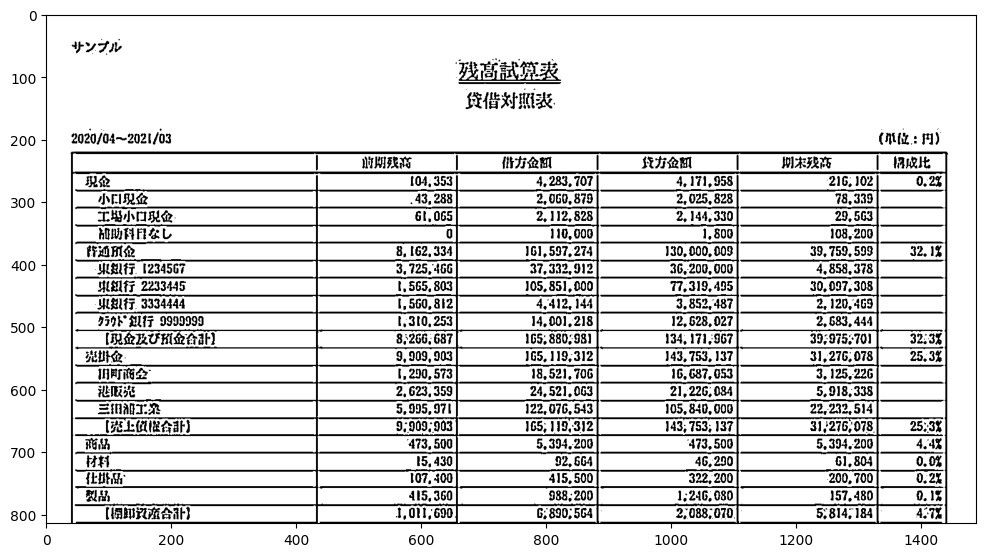

モルフォロジー演算でノイズをさらに除去


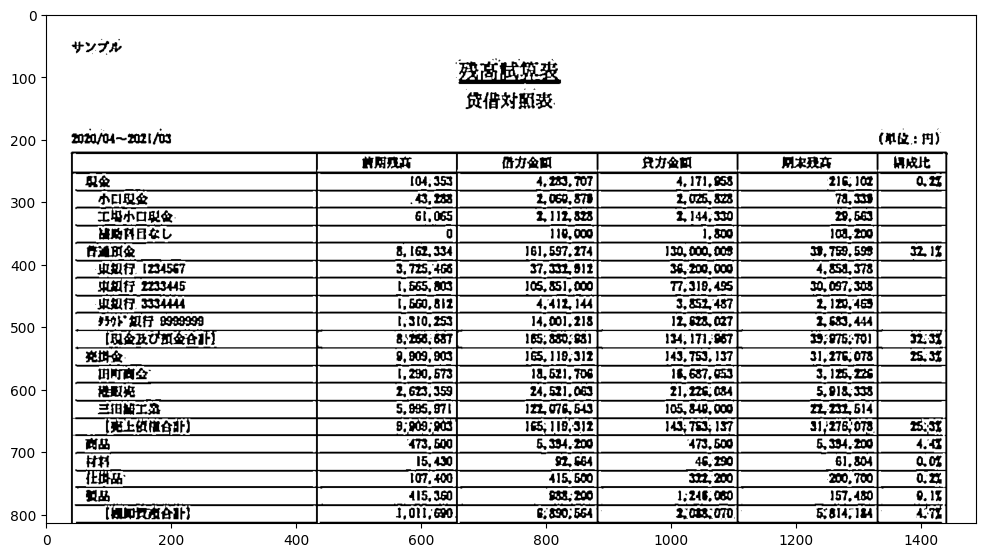

コントラスト調整


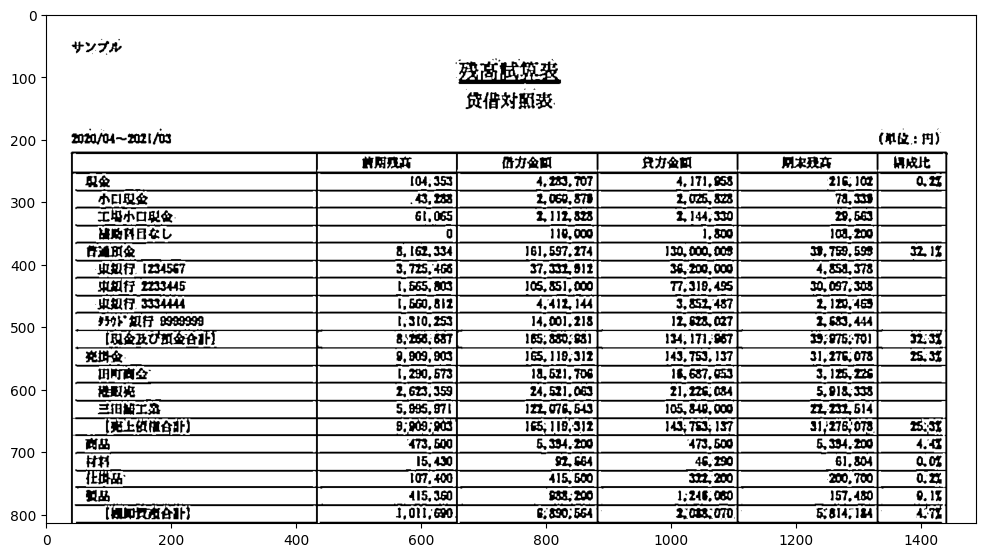

エッジ強調


In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_array(array):
    plt.figure(figsize=(12, 12))  
    plt.imshow(array,cmap="gray")
    plt.show()


def preprocess_image(image_path):
    # 画像の読み込み
    print("画像の読み込み")
    image = cv2.imread(image_path)
    
    # グレースケール変換
    print("グレースケール変換")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plot_array(image)
    
    # ガウシアンブラーでノイズ除去
    print("ガウシアンブラーでノイズ除去")
    image = cv2.GaussianBlur(image, (5, 5), 0)
    plot_array(image)
    
    # 二値化（適応的閾値処理）
    print("二値化（適応的閾値処理）")
    image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                   cv2.THRESH_BINARY, 11, 2)
    plot_array(image)
    
    # モルフォロジー演算でノイズをさらに除去
    print("モルフォロジー演算でノイズをさらに除去")
    kernel = np.ones((3,3), np.uint8)
    image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=1)
    plot_array(image)
    
    # コントラスト調整
    print("コントラスト調整")
    alpha = 1.5 # コントラスト制御（1.0-3.0）
    beta = 0    # 明るさ制御（0-100）
    image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    plot_array(image)
    
    # エッジ強調
    print("エッジ強調")
    edges = cv2.Canny(image, 50, 150)
    
    return image, edges

# 使用例
image_path = 'shisanhyo_down.jpg'
preprocessed, edges = preprocess_image(image_path)

# print("結果の表示")
# # 結果の表示
# cv2.imshow('Preprocessed Image', preprocessed)
# # cv2.imshow('Edges', edges)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# 結果の保存
# cv2.imwrite('shisanhyo_preprocess.jpg', preprocessed)
# cv2.imwrite('shisanhyo_edges.jpg', edges)

グレースケール変換


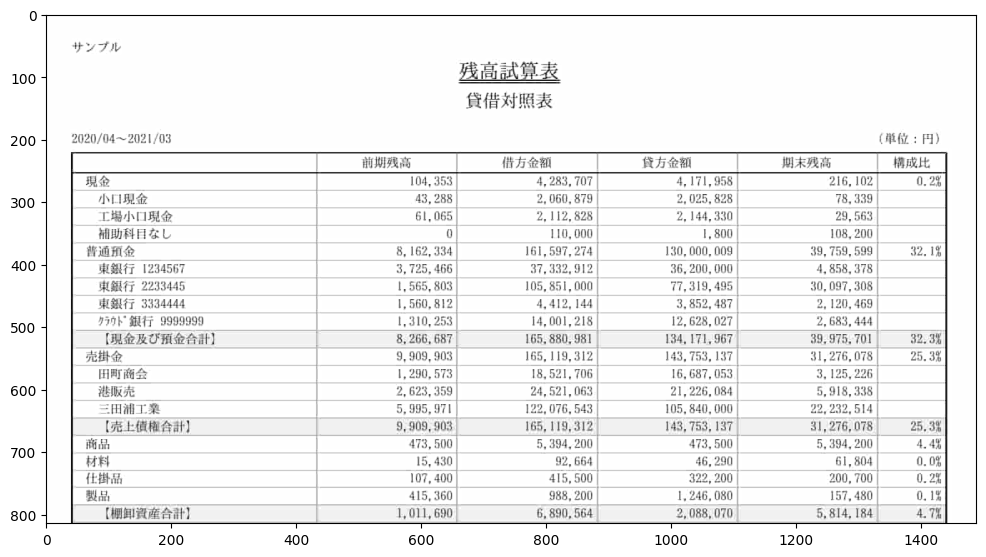

ノイズ除去（GaussianBlur）


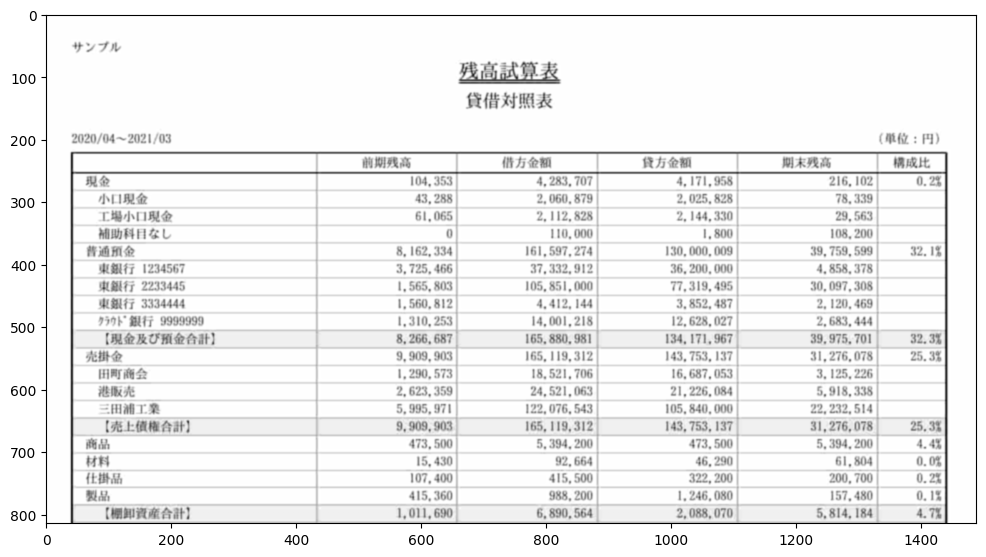

二値化（適応的閾値処理）


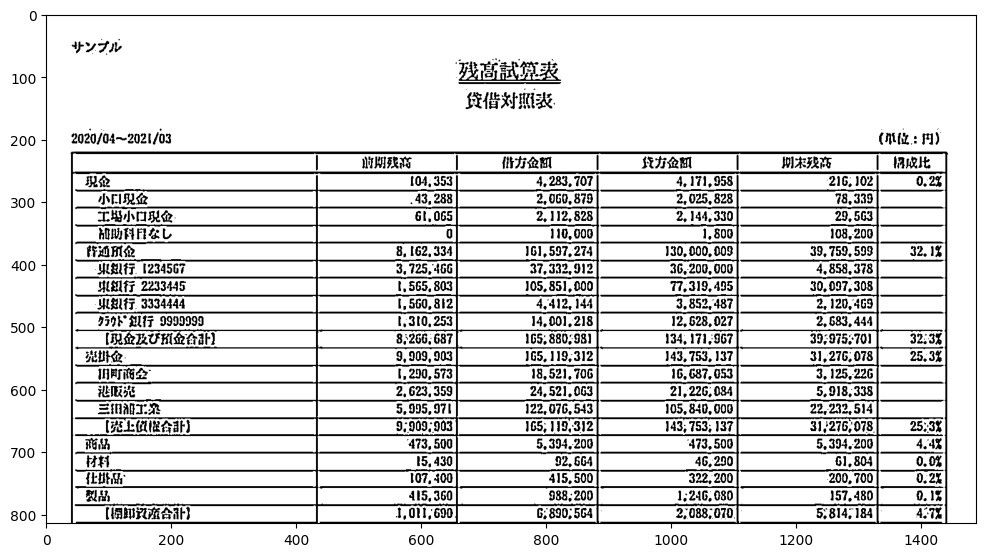

ノイズ除去（モルフォロジー処理


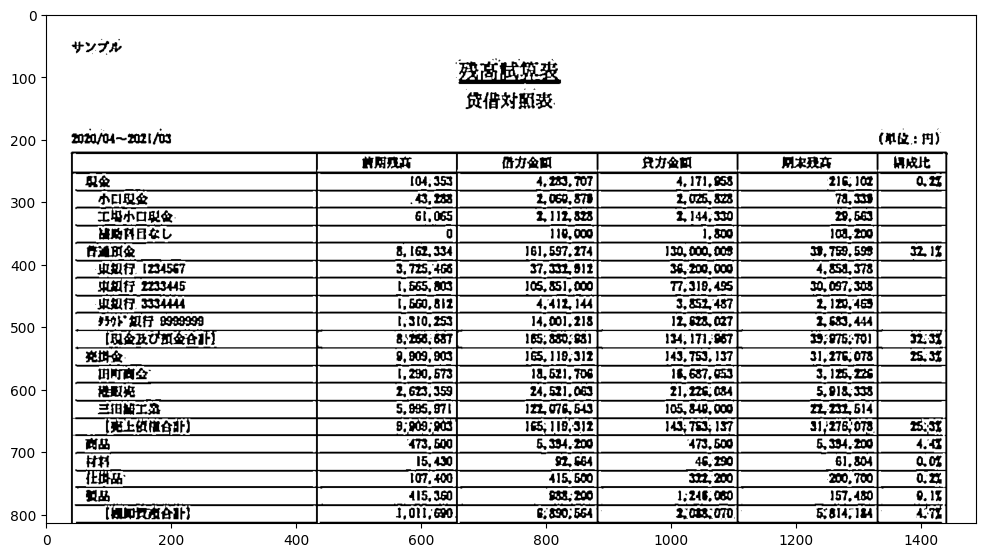

コントラスト調整（ヒストグラム均等化）


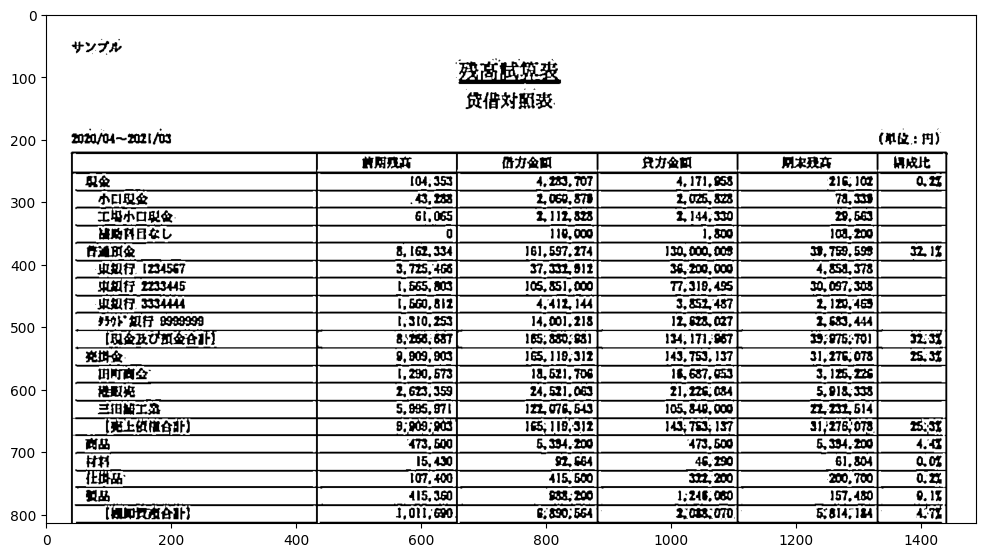

In [19]:
# 入力画像の読み込み
input_image_path = "shisanhyo_down.jpg"  # 前処理する画像のパス
output_image_path = "shisanhyo_preprocess_.jpg"  # 処理後の画像保存先
image = cv2.imread(input_image_path)

# グレースケール変換
print("グレースケール変換")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plot_array(image)

# ノイズ除去（GaussianBlur）
print("ノイズ除去（GaussianBlur）")
image = cv2.GaussianBlur(image, (5, 5), 0)
plot_array(image)

# 二値化（適応的閾値処理）
print("二値化（適応的閾値処理）")
image = cv2.adaptiveThreshold(
    image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)
plot_array(image)

# ノイズ除去（モルフォロジー処理: 開演算）
print("ノイズ除去（モルフォロジー処理")
kernel = np.ones((3, 3), np.uint8)
image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
plot_array(image)

# コントラスト調整（ヒストグラム均等化）
print("コントラスト調整（ヒストグラム均等化）")
image = cv2.equalizeHist(image)
plot_array(image)
